In [1]:
from catboost import CatBoostClassifier, Pool

C:\Users\nourd\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os

In [3]:
# set the working directory 
os.chdir('C:\\Users\\nourd\\OneDrive\\Documents\\Master of Research\\Thesis - Master\\CDP Reports\\Databases')

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import pickle

In [7]:
import random

In [8]:
with open('df_full.pkl', 'rb') as f:
    df_full = pickle.load(f)

In [9]:
df_full.shape

(1244, 52)

In [10]:
df_full.columns

Index(['Organization', 'Country', 'Primary activity', 'Primary sector',
       'Primary industry', 'W4_1_inherent_water_risks_identified',
       'W4_3_water_opportunities_identified',
       'W4_2b_C1_no_direct_risk_primary_reason',
       'W4_2c_C1_no_value_chain_risk_primary_reason',
       'W4_3b_C1_no_opportunities_primary_reason',
       'w4_1b_c2_percent_facilities_exposed_to_water_risk',
       'w5_1d_pct_verified_Row4', 'w5_1d_pct_verified_Row5',
       'w5_1d_pct_verified_Row2', 'w5_1c_pct_recycled_Row4',
       'w5_1c_pct_recycled_Row1', 'w5_1c_pct_recycled_Row3',
       'w8_1_c1_target_goal_levels', 'w8_1_c2_corporate_monitoring',
       'w8_1c_c1_no_target_goal_primary_reason',
       'w73a_identified_water_outcomes', 'w73c1_use_scenario_analysis',
       'w73bc1_climate_scenarios', 'w22_subject_to_water_fines',
       'w22b_c1_type_of_penalty', 'w22b_c5_penalties_type_of_incident',
       'w6_has_water_policy', 'w6_board_oversight_water_issues',
       'w6_influence_water

In [11]:
# remove the rows where the value is NA for the target variables 
df_full.dropna(subset=['w21_experienced_water_impacts'], inplace=True) 

In [12]:
cat_columns = [
    'Organization', 'Country', 'Primary activity', 'Primary sector',
    'Primary industry',
    'W4_1_inherent_water_risks_identified',
    'W4_3_water_opportunities_identified',
    'W4_2b_C1_no_direct_risk_primary_reason',
    'W4_2c_C1_no_value_chain_risk_primary_reason',
    'W4_3b_C1_no_opportunities_primary_reason',
    'w4_1b_c2_percent_facilities_exposed_to_water_risk', 
    'w5_1d_pct_verified_Row4',
    'w5_1d_pct_verified_Row5',
    'w5_1d_pct_verified_Row2',
    'w5_1c_pct_recycled_Row4',
    'w5_1c_pct_recycled_Row1',
    'w5_1c_pct_recycled_Row3',
    'w8_1_c1_target_goal_levels',
    'w8_1_c2_corporate_monitoring',
    'w8_1c_c1_no_target_goal_primary_reason',
    'w73a_identified_water_outcomes',
    'w73c1_use_scenario_analysis',
    'w73bc1_climate_scenarios',
    'w22_subject_to_water_fines',
    'w22b_c1_type_of_penalty',
    'w22b_c5_penalties_type_of_incident',
    'w6_has_water_policy',
    'w6_board_oversight_water_issues',
    'w6_influence_water_policy_activities',
    'w6_1a_water_policy_scope',
    'w6_2b_water_issues_agenda_frequency',
    'w6_2c_no_board_oversight_reason',
    'w6_2c_oversight_planned_in_2_years'
]

In [13]:
for col in cat_columns:
    df_full[col] = df_full[col].fillna('NaN').astype(str)

In [14]:
#set the features and the target variables 
X = df_full.drop(columns=['w21_experienced_water_impacts'])
y = df_full['w21_experienced_water_impacts'] 

In [15]:
# Initialize model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0)

In [16]:
# convert the categorical variable 
y = y.map({'No': 0, 'Yes': 1}) 

In [17]:
# test for data imbalance 
y.value_counts()

w21_experienced_water_impacts
0    1013
1     192
Name: count, dtype: int64

In [18]:
numerical_columns = [
    'w4_1b_c1_total_facilities_exposed_to_water_risk',
    'w5_1_withdrawals_ml_Row5',
    'w5_1_withdrawals_ml_Row0',
    'w5_1_withdrawals_ml_Row2',
    'w5_1_discharges_ml_Row0',
    'w5_1_discharges_ml_Row2',
    'w5_1_discharges_ml_Row3',
    'w5_1_consumption_ml_Row1',
    'w5_1_consumption_ml_Row0',
    'w5_1_consumption_ml_Row3',
    'w5_1a_groundwater_renewable_Row1',
    'w5_1a_groundwater_renewable_Row5',
    'w5_1a_groundwater_renewable_Row4',
    'w22b_c2_penalties_financial_impact',
    'w72c1_capex_change',
    'w72c2_capex_forward_trend',
    'w72c3_opex_change',
    'w72c4_opex_forward_trend',
]

In [19]:
df_full['w5_1d_pct_verified_Row4'].value_counts()

w5_1d_pct_verified_Row4
Question not applicable    734
76-100                     220
Not verified               217
1-25                        14
51-75                       10
nan                          7
26-50                        3
Name: count, dtype: int64

In [20]:
# Fit model
model.fit(X, y, cat_features=cat_columns)

In [21]:
# Get feature importances
feature_importances = model.get_feature_importance(prettified=True)
print(feature_importances) 

                                           Feature Id  Importances
0                W4_1_inherent_water_risks_identified     6.116364
1                                             Country     5.628226
2                w6_influence_water_policy_activities     4.395546
3                                    Primary industry     4.118119
4                         w73c1_use_scenario_analysis     4.077414
5                          w22_subject_to_water_fines     3.768564
6   w4_1b_c2_percent_facilities_exposed_to_water_risk     3.231993
7                                    Primary activity     3.222188
8                 w6_2b_water_issues_agenda_frequency     3.188102
9                                      Primary sector     3.183175
10    w4_1b_c1_total_facilities_exposed_to_water_risk     3.088288
11                       w8_1_c2_corporate_monitoring     3.068193
12                         w8_1_c1_target_goal_levels     2.978715
13                           w6_1a_water_policy_scope     2.89

In [22]:
# Step 2: Get feature importances (prettified)
feature_importance_df = model.get_feature_importance(prettified=True)

# Step 3: Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importances', ascending=False)

# Step 4: Calculate cumulative importance
feature_importance_df['Cumulative'] = feature_importance_df['Importances'].cumsum()

# Step 5: Select features contributing up to 95% of importance
top_features = feature_importance_df[feature_importance_df['Cumulative'] <= 95]

# Step 6: Display
print("Top features contributing 95% of total importance:")
print(top_features) 

Top features contributing 95% of total importance:
                                           Feature Id  Importances  Cumulative
0                W4_1_inherent_water_risks_identified     6.116364    6.116364
1                                             Country     5.628226   11.744590
2                w6_influence_water_policy_activities     4.395546   16.140137
3                                    Primary industry     4.118119   20.258255
4                         w73c1_use_scenario_analysis     4.077414   24.335669
5                          w22_subject_to_water_fines     3.768564   28.104233
6   w4_1b_c2_percent_facilities_exposed_to_water_risk     3.231993   31.336226
7                                    Primary activity     3.222188   34.558414
8                 w6_2b_water_issues_agenda_frequency     3.188102   37.746516
9                                      Primary sector     3.183175   40.929692
10    w4_1b_c1_total_facilities_exposed_to_water_risk     3.088288   44.017980
1

In [23]:
model_features = top_features['Feature Id'] 

In [24]:
X.columns

Index(['Organization', 'Country', 'Primary activity', 'Primary sector',
       'Primary industry', 'W4_1_inherent_water_risks_identified',
       'W4_3_water_opportunities_identified',
       'W4_2b_C1_no_direct_risk_primary_reason',
       'W4_2c_C1_no_value_chain_risk_primary_reason',
       'W4_3b_C1_no_opportunities_primary_reason',
       'w4_1b_c2_percent_facilities_exposed_to_water_risk',
       'w5_1d_pct_verified_Row4', 'w5_1d_pct_verified_Row5',
       'w5_1d_pct_verified_Row2', 'w5_1c_pct_recycled_Row4',
       'w5_1c_pct_recycled_Row1', 'w5_1c_pct_recycled_Row3',
       'w8_1_c1_target_goal_levels', 'w8_1_c2_corporate_monitoring',
       'w8_1c_c1_no_target_goal_primary_reason',
       'w73a_identified_water_outcomes', 'w73c1_use_scenario_analysis',
       'w73bc1_climate_scenarios', 'w22_subject_to_water_fines',
       'w22b_c1_type_of_penalty', 'w22b_c5_penalties_type_of_incident',
       'w6_has_water_policy', 'w6_board_oversight_water_issues',
       'w6_influence_water

In [25]:
cols_model_features = model_features.tolist()

In [26]:
X.columns

Index(['Organization', 'Country', 'Primary activity', 'Primary sector',
       'Primary industry', 'W4_1_inherent_water_risks_identified',
       'W4_3_water_opportunities_identified',
       'W4_2b_C1_no_direct_risk_primary_reason',
       'W4_2c_C1_no_value_chain_risk_primary_reason',
       'W4_3b_C1_no_opportunities_primary_reason',
       'w4_1b_c2_percent_facilities_exposed_to_water_risk',
       'w5_1d_pct_verified_Row4', 'w5_1d_pct_verified_Row5',
       'w5_1d_pct_verified_Row2', 'w5_1c_pct_recycled_Row4',
       'w5_1c_pct_recycled_Row1', 'w5_1c_pct_recycled_Row3',
       'w8_1_c1_target_goal_levels', 'w8_1_c2_corporate_monitoring',
       'w8_1c_c1_no_target_goal_primary_reason',
       'w73a_identified_water_outcomes', 'w73c1_use_scenario_analysis',
       'w73bc1_climate_scenarios', 'w22_subject_to_water_fines',
       'w22b_c1_type_of_penalty', 'w22b_c5_penalties_type_of_incident',
       'w6_has_water_policy', 'w6_board_oversight_water_issues',
       'w6_influence_water

In [27]:
X_filtered = X[cols_model_features]

In [28]:
#X_filtered = X[cols_model_features + ['Organization', 'Country', 'Primary activity', 'Primary sector','Primary industry']] 

In [29]:
X_filtered.columns

Index(['W4_1_inherent_water_risks_identified', 'Country',
       'w6_influence_water_policy_activities', 'Primary industry',
       'w73c1_use_scenario_analysis', 'w22_subject_to_water_fines',
       'w4_1b_c2_percent_facilities_exposed_to_water_risk', 'Primary activity',
       'w6_2b_water_issues_agenda_frequency', 'Primary sector',
       'w4_1b_c1_total_facilities_exposed_to_water_risk',
       'w8_1_c2_corporate_monitoring', 'w8_1_c1_target_goal_levels',
       'w6_1a_water_policy_scope', 'W4_3b_C1_no_opportunities_primary_reason',
       'W4_2b_C1_no_direct_risk_primary_reason',
       'w6_board_oversight_water_issues', 'w73bc1_climate_scenarios',
       'w5_1_withdrawals_ml_Row5', 'w6_has_water_policy',
       'w5_1_consumption_ml_Row1', 'w5_1d_pct_verified_Row5',
       'w22b_c5_penalties_type_of_incident',
       'W4_2c_C1_no_value_chain_risk_primary_reason',
       'w5_1_discharges_ml_Row2', 'w6_2c_no_board_oversight_reason',
       'w73a_identified_water_outcomes', 'w72c2_ca

In [30]:
cat_features = [
    'W4_1_inherent_water_risks_identified',
    'Country',
    'w6_influence_water_policy_activities',
    'Primary industry',
    'w73c1_use_scenario_analysis',
    'w22_subject_to_water_fines',
    'w4_1b_c2_percent_facilities_exposed_to_water_risk',
    'Primary activity',
    'w6_2b_water_issues_agenda_frequency',
    'Primary sector',
    'w8_1_c2_corporate_monitoring',
    'w8_1_c1_target_goal_levels',
    'w6_1a_water_policy_scope',
    'W4_3b_C1_no_opportunities_primary_reason',
    'W4_2b_C1_no_direct_risk_primary_reason',
    'w6_board_oversight_water_issues',
    'w73bc1_climate_scenarios',
    'w6_has_water_policy',
    'w5_1d_pct_verified_Row5',
    'w22b_c5_penalties_type_of_incident',
    'W4_2c_C1_no_value_chain_risk_primary_reason',
    'w6_2c_no_board_oversight_reason',
    'w73a_identified_water_outcomes',
    'w5_1d_pct_verified_Row2',
    'w5_1c_pct_recycled_Row3',
    'w5_1d_pct_verified_Row4',
    'w5_1c_pct_recycled_Row1'
]

In [31]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
# Fit model
model.fit(X_filtered, y, cat_features=cat_features)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
y_pred = model.predict(X_test)

In [35]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# More detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9087136929460581

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       203
           1       1.00      0.42      0.59        38

    accuracy                           0.91       241
   macro avg       0.95      0.71      0.77       241
weighted avg       0.92      0.91      0.89       241


Confusion Matrix:
[[203   0]
 [ 22  16]]


### Model After dealing with class imbalance 

For the class imbalance, we will not use SMOTE as it deals only with numeric data.  

In [36]:
from sklearn.utils.class_weight import compute_class_weight

In [37]:
import numpy as np

In [38]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train) 
rounded_weights = np.round(class_weights,2)
print(dict(zip(np.unique(y_train), rounded_weights)))

{0: 0.6, 1: 3.13}


In [39]:
weights = [0.6,3.13] 

In [40]:
model_balance = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    eval_metric='F1',
    class_weights=weights,  # adjust according to class imbalance
    cat_features=cat_features,  # list of categorical feature column indices or names 
    verbose = 0 
    
)

model_balance.fit(X_train, y_train)

In [41]:
y_pred_1 = model_balance.predict(X_test)

In [42]:
# Accuracy
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy:", accuracy_1)

# More detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_1))

Accuracy: 0.8589211618257261

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       203
           1       0.57      0.45      0.50        38

    accuracy                           0.86       241
   macro avg       0.73      0.69      0.71       241
weighted avg       0.85      0.86      0.85       241


Confusion Matrix:
[[190  13]
 [ 21  17]]


In [43]:
from sklearn.metrics import f1_score

In [44]:
for w in [10,20]:
    model = CatBoostClassifier(class_weights=[1, w],cat_features=cat_features,verbose = 0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"Weight: {w}, F1 Score: {f1_score(y_test, preds)}")

Weight: 10, F1 Score: 0.42622950819672134
Weight: 20, F1 Score: 0.40476190476190477


In [45]:
model_2 = CatBoostClassifier(auto_class_weights='Balanced', verbose=0,cat_features=cat_features)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
# Accuracy
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy_2)

# More detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_2))

Accuracy: 0.7925311203319502

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       203
           1       0.39      0.55      0.46        38

    accuracy                           0.79       241
   macro avg       0.65      0.70      0.66       241
weighted avg       0.83      0.79      0.81       241


Confusion Matrix:
[[170  33]
 [ 17  21]]


### Upsampling 

In [46]:
from sklearn.utils import resample

In [47]:
# Combine features and target
train_df = pd.concat([X_train, y_train], axis=1)

In [48]:
# Separate majority and minority
df_majority = train_df[train_df['w21_experienced_water_impacts'] == 0]
df_minority = train_df[train_df['w21_experienced_water_impacts'] == 1]

In [49]:
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),  # Match majority class
                                 random_state=42)  # Reproducibility


In [50]:
# Combine back
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [51]:
df_upsampled['w21_experienced_water_impacts'].value_counts()

w21_experienced_water_impacts
0    810
1    810
Name: count, dtype: int64

In [52]:
# Split back into X and y
X_train_upsampled = df_upsampled.drop(columns=['w21_experienced_water_impacts'])
y_train_upsampled = df_upsampled['w21_experienced_water_impacts']

In [53]:
y_test.value_counts()

w21_experienced_water_impacts
0    203
1     38
Name: count, dtype: int64

In [54]:
model_3 = CatBoostClassifier(verbose=0,cat_features=cat_features)
model_3.fit(X_train_upsampled, y_train_upsampled)
y_pred_3 = model_3.predict(X_test)
# Accuracy
accuracy_3 = accuracy_score(y_test, y_pred_3)
print("Accuracy:", accuracy_3)

# More detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred_3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_3))

Accuracy: 0.8713692946058091

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       203
           1       1.00      0.18      0.31        38

    accuracy                           0.87       241
   macro avg       0.93      0.59      0.62       241
weighted avg       0.89      0.87      0.83       241


Confusion Matrix:
[[203   0]
 [ 31   7]]


### SHAP Values 

In [58]:
import shap

In [55]:
# Get SHAP values
shap_values = model_3.get_feature_importance(Pool(X_train, label=y_train, cat_features=cat_features), 
                                           type="ShapValues")

In [56]:
# Drop the last column (base value)
shap_values_no_base = shap_values[:, :-1]

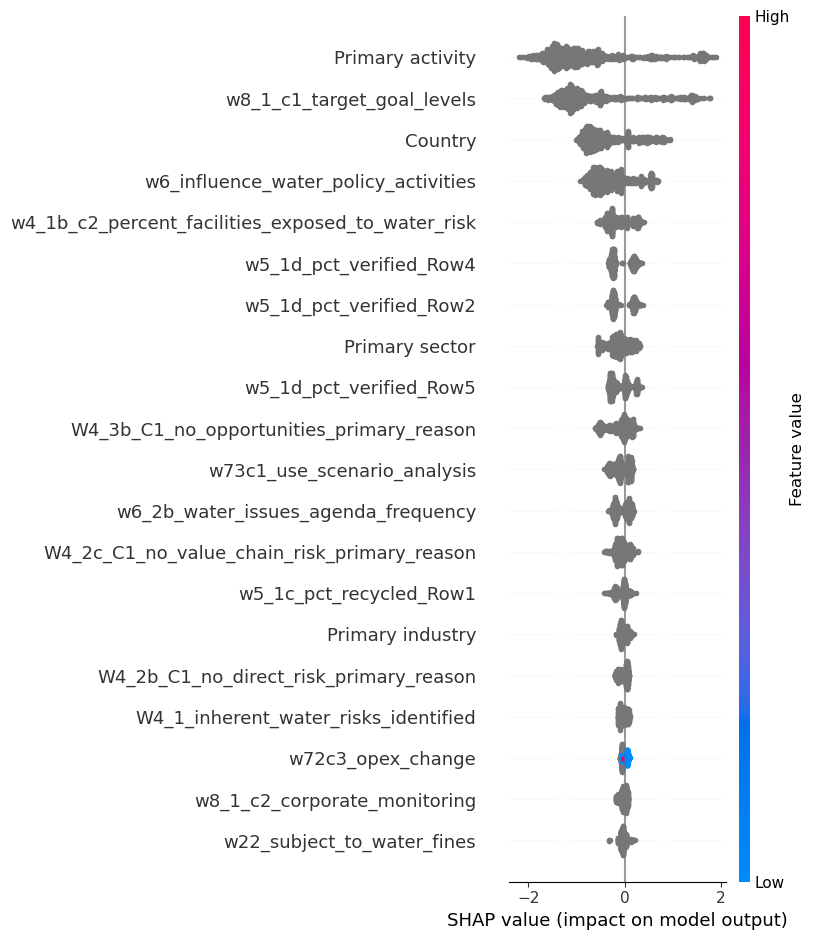

In [59]:
# Plot SHAP summary
shap.summary_plot(shap_values_no_base, X_train)

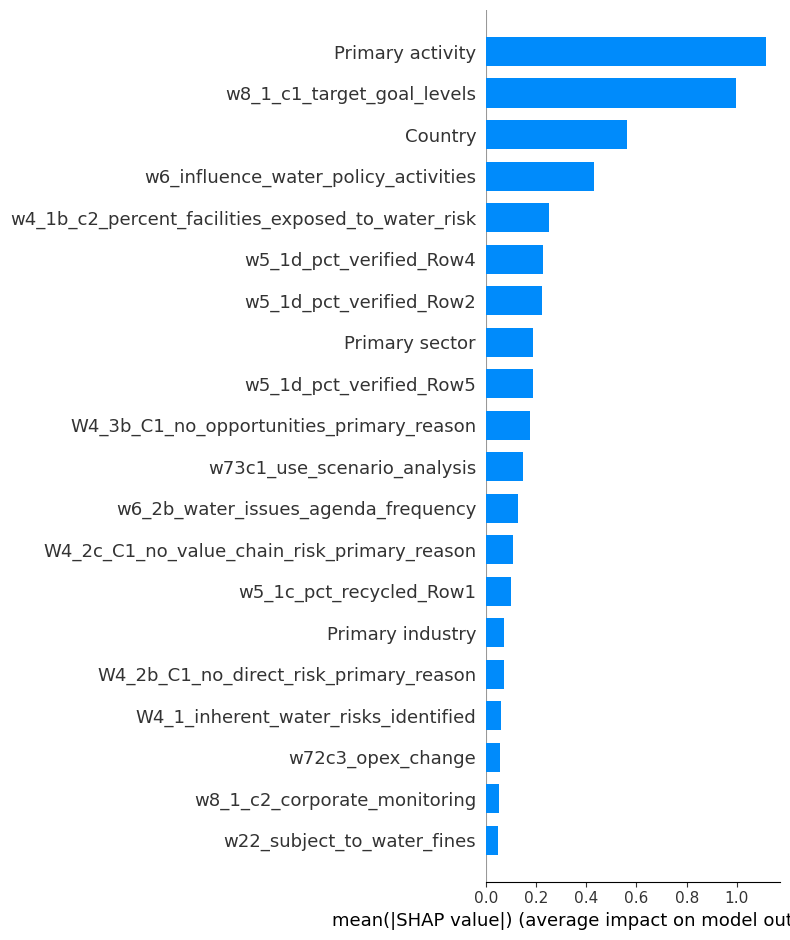

In [60]:
shap.summary_plot(shap_values_no_base, X_train, plot_type="bar")

In [61]:
X_train.shape

(964, 36)

In [62]:
# compute SHAP values
explainer = shap.TreeExplainer(model_3, feature_perturbation="tree_path_dependent")
explanation = explainer(X_train[:965]) 

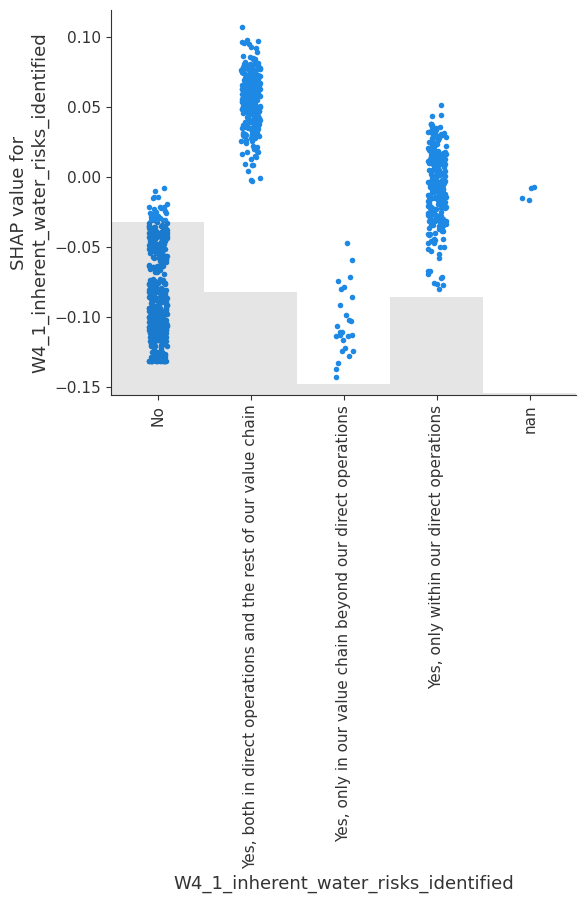

In [63]:
shap.plots.scatter(explanation[:, "W4_1_inherent_water_risks_identified"])

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
import warnings
warnings.filterwarnings("ignore")

According to the plot above the top 4 most affecting factors to the model results are : **Primary activity**, **w8_1_c1_target_goal_levels**, **Country** , **w6_influence_water_policy_activities**. However these features have many instances out of which we will plot the most affecting ones. 

In [66]:
X_train.columns

Index(['W4_1_inherent_water_risks_identified', 'Country',
       'w6_influence_water_policy_activities', 'Primary industry',
       'w73c1_use_scenario_analysis', 'w22_subject_to_water_fines',
       'w4_1b_c2_percent_facilities_exposed_to_water_risk', 'Primary activity',
       'w6_2b_water_issues_agenda_frequency', 'Primary sector',
       'w4_1b_c1_total_facilities_exposed_to_water_risk',
       'w8_1_c2_corporate_monitoring', 'w8_1_c1_target_goal_levels',
       'w6_1a_water_policy_scope', 'W4_3b_C1_no_opportunities_primary_reason',
       'W4_2b_C1_no_direct_risk_primary_reason',
       'w6_board_oversight_water_issues', 'w73bc1_climate_scenarios',
       'w5_1_withdrawals_ml_Row5', 'w6_has_water_policy',
       'w5_1_consumption_ml_Row1', 'w5_1d_pct_verified_Row5',
       'w22b_c5_penalties_type_of_incident',
       'W4_2c_C1_no_value_chain_risk_primary_reason',
       'w5_1_discharges_ml_Row2', 'w6_2c_no_board_oversight_reason',
       'w73a_identified_water_outcomes', 'w72c2_ca

In [67]:
# Create a DataFrame for analysis
primary_activity_shap = pd.DataFrame({
    "Primary Activity": X_train["Primary activity"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc("Primary activity")]
})

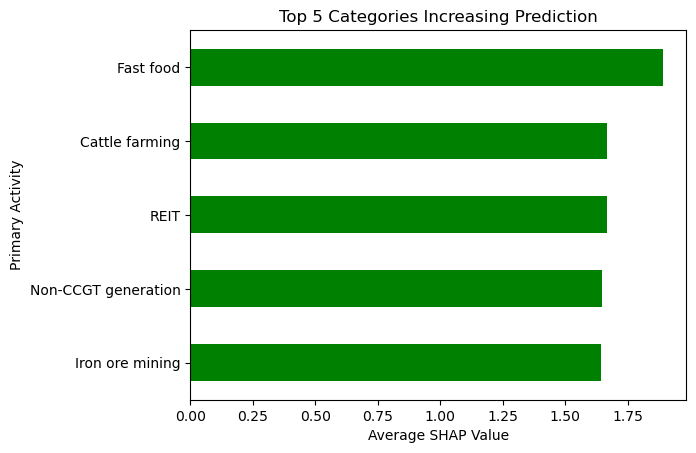

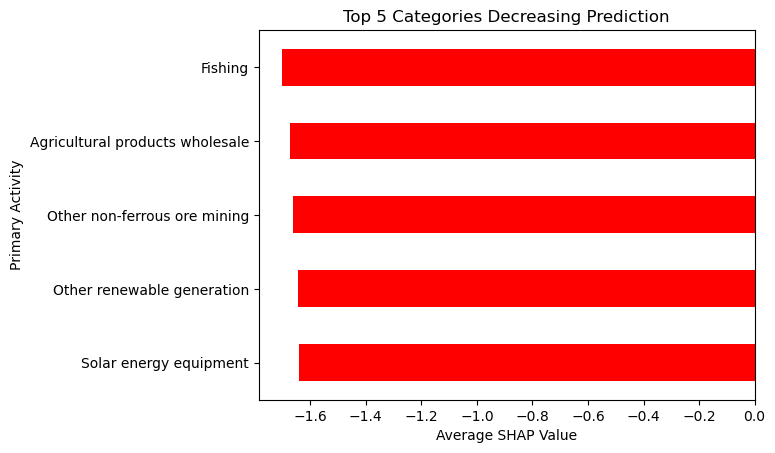

In [68]:
# Calculate average SHAP value per category
activity_impact = primary_activity_shap.groupby("Primary Activity")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = activity_impact.sort_values(ascending=False).head(5)
top_5_negative = activity_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Categories Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Categories Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

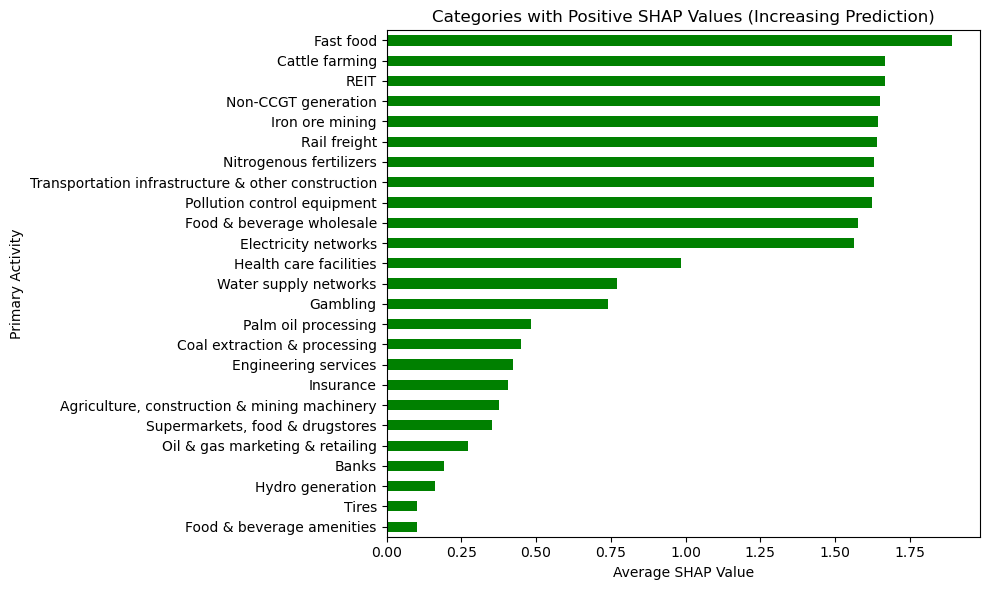

In [69]:
### Industries with a positive shapley value 
# Calculate average SHAP value per category
activity_impact = primary_activity_shap.groupby("Primary Activity")["SHAP_Value"].mean()

# Filter only categories with positive SHAP values
positive_impact = activity_impact[activity_impact > 0].sort_values(ascending=True)  # sorted for better barh display

# Plot all positive-impact categories
positive_impact.plot(kind='barh', color='green', figsize=(10, 6))
plt.title("Categories with Positive SHAP Values (Increasing Prediction)")
plt.xlabel("Average SHAP Value")
plt.ylabel("Primary Activity")
plt.tight_layout()
plt.show()

In [70]:
activities_to_display = [
    'Agriculture, construction & mining machinery',
    'Alcoholic beverages',
    'Apparel & footwear design',
    'Automobiles',
    'Basic plastics',
    'Cattle farming',
    'Cement',
    'Electrical equipment',
    'Electronic components',
    'Electronic equipment',
    'Fabricated metal components',
    'Household appliances',
    'IT services',
    'Industrial machinery',
    'Medical equipment',
    'Non-alcoholic beverages',
    'Other base chemicals',
    'Other food processing',
    'Paper packaging',
    'Paper products',
    'Personal care & household products',
    'Pharmaceuticals',
    'Plastic products',
    'Printing services',
    'Residential building construction',
    'Rubber products',
    'Semiconductors',
    'Supermarkets, food & drugstores',
    'Tires',
    'Transportation infrastructure & other construction'
]

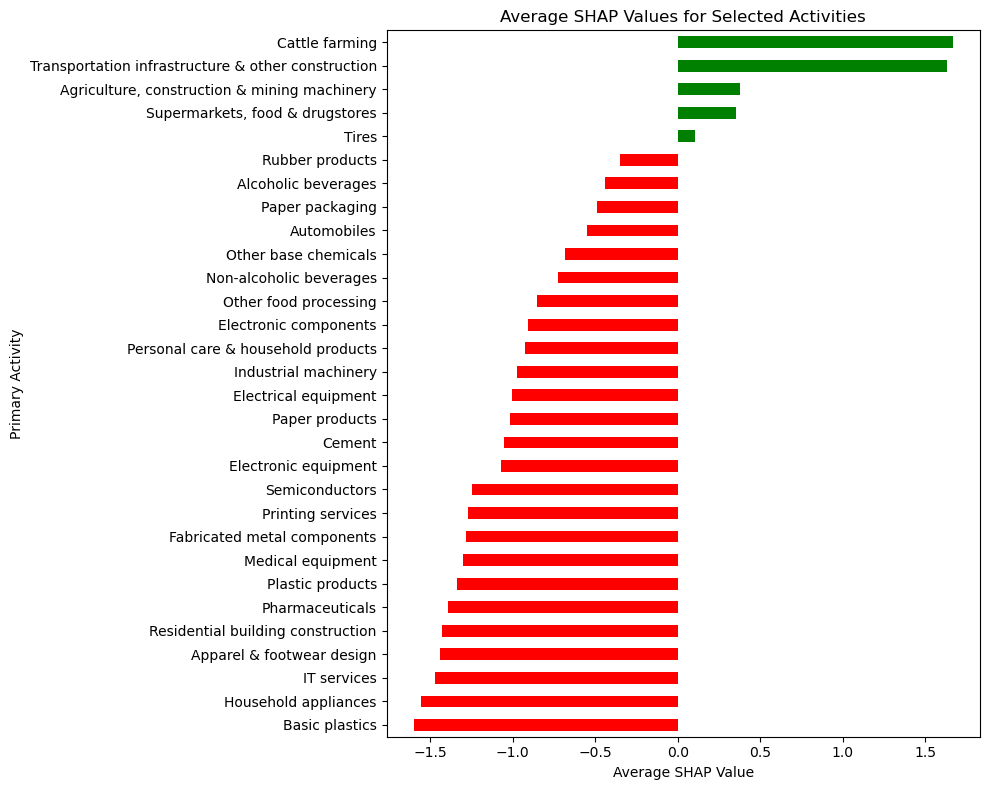

In [71]:
# Filter the DataFrame to include only the specified activities
filtered_shap = primary_activity_shap[primary_activity_shap["Primary Activity"].isin(activities_to_display)]

# Calculate average SHAP value per activity (already filtered)
filtered_impact = filtered_shap.groupby("Primary Activity")["SHAP_Value"].mean().sort_values(ascending=True)

# Create a color list: green if value > 0 else red
colors = ['green' if val > 0 else 'red' for val in filtered_impact]

# Plot with custom colors
filtered_impact.plot(kind='barh', color=colors, figsize=(10, 8))
plt.title("Average SHAP Values for Selected Activities")
plt.xlabel("Average SHAP Value")
plt.ylabel("Primary Activity")
plt.tight_layout()
plt.show()

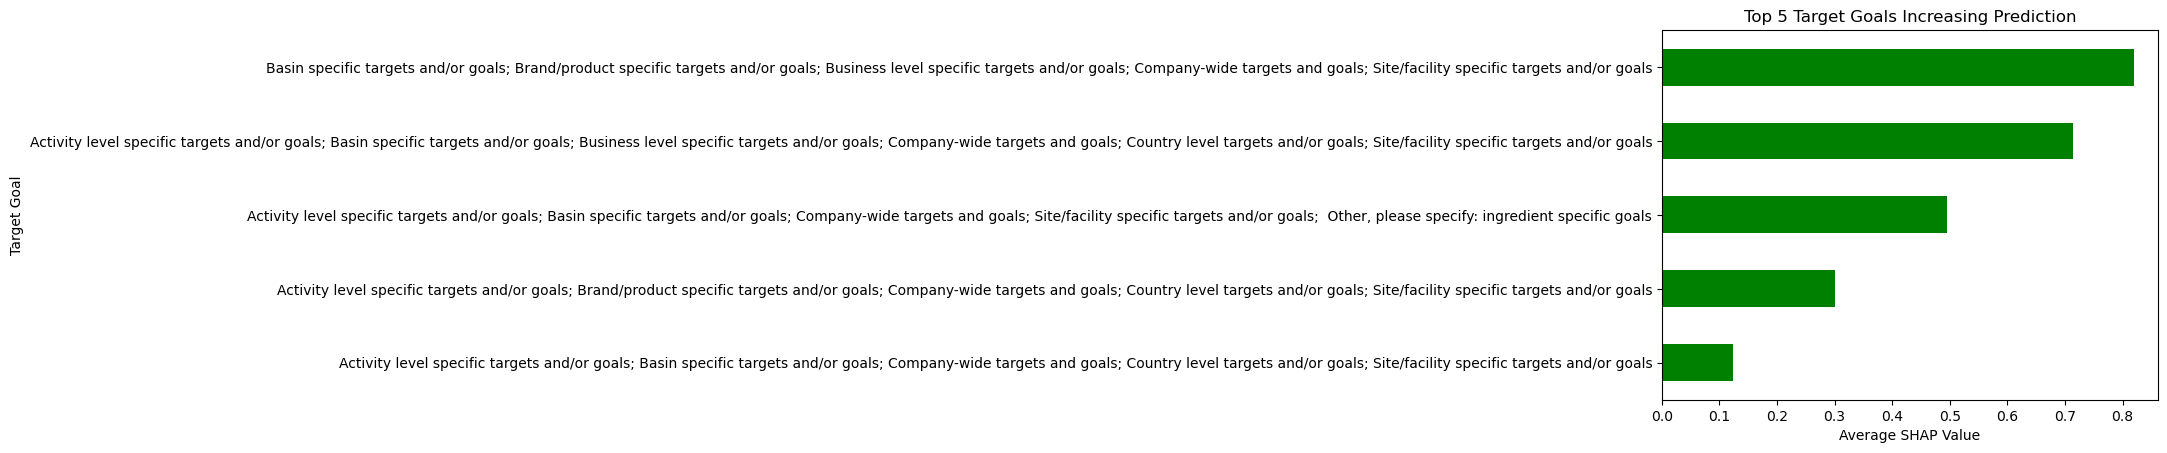

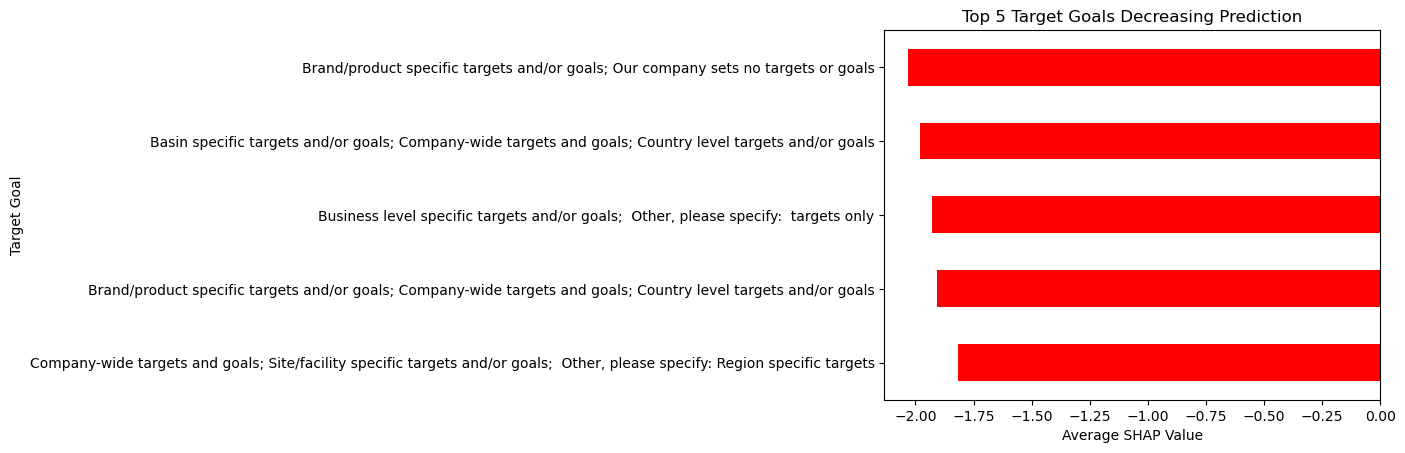

In [94]:
# Create a DataFrame for analysis
target_goal_level = pd.DataFrame({
    "Target Goal": X_train["w8_1_c1_target_goal_levels"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc("Primary activity")]
})

# Calculate average SHAP value per category
target_goal_impact = target_goal_level.groupby("Target Goal")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = target_goal_impact.sort_values(ascending=False).head(5)
top_5_negative = target_goal_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Target Goals Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Target Goals Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

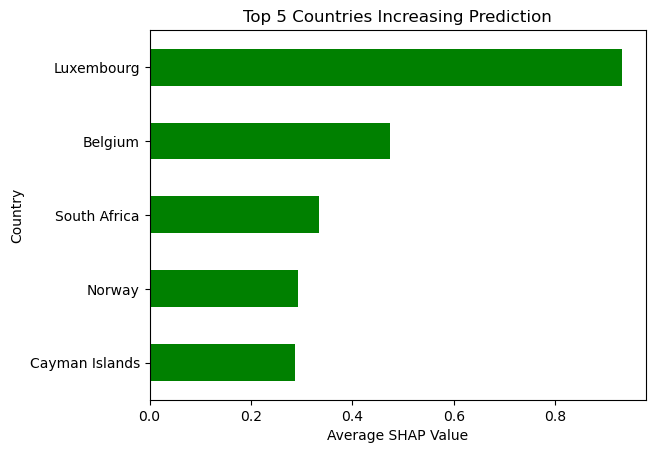

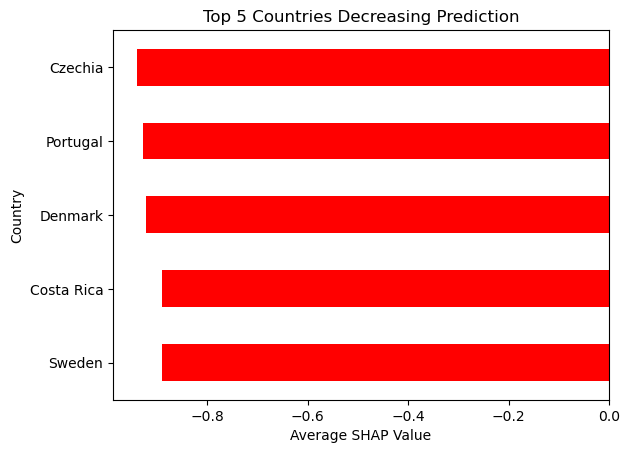

In [73]:
# Create a DataFrame for analysis
country_level = pd.DataFrame({
    "Country": X_train["Country"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc("Country")]
})

# Calculate average SHAP value per category
country_impact = country_level.groupby("Country")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = country_impact.sort_values(ascending=False).head(5)
top_5_negative = country_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Countries Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Countries Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

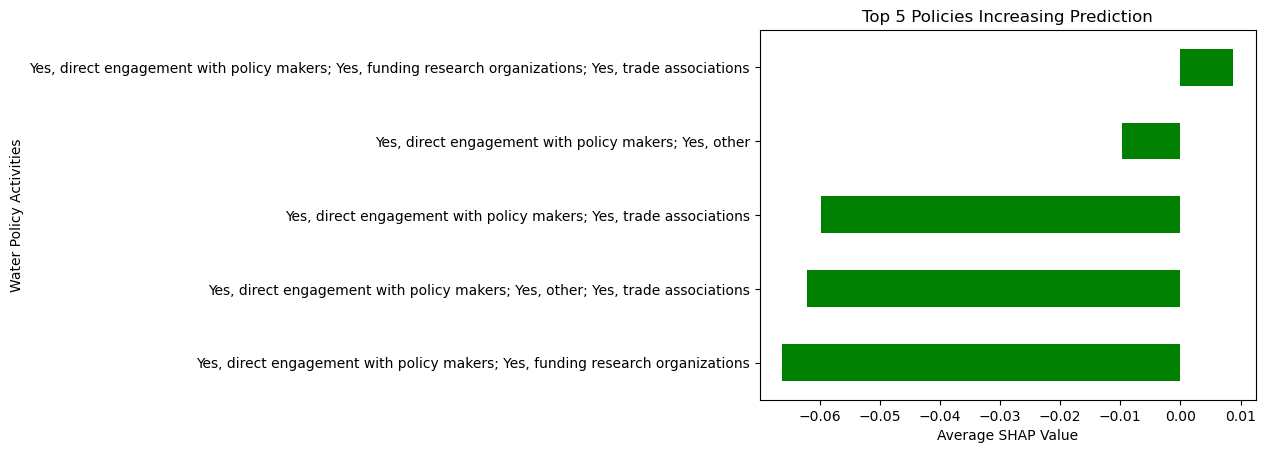

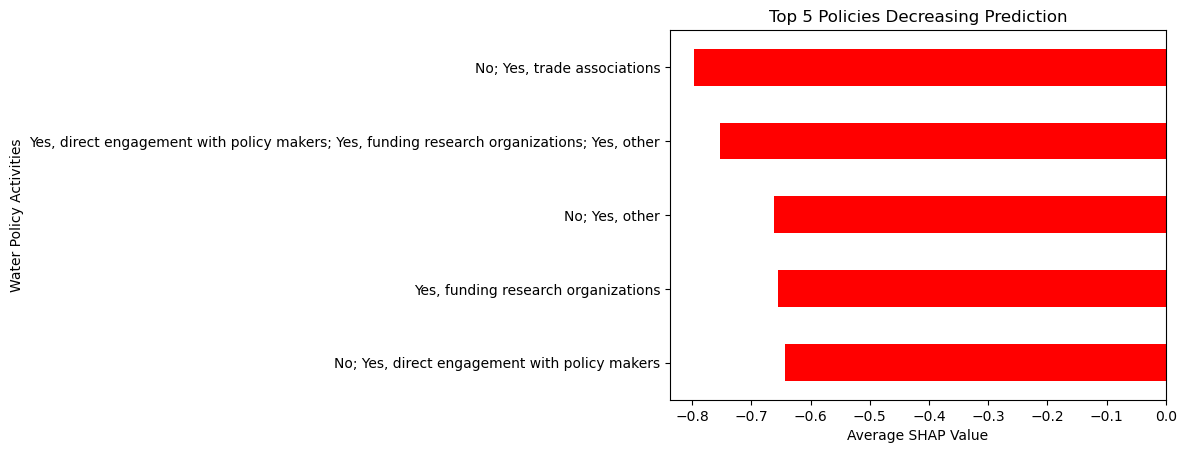

In [74]:
# Create a DataFrame for analysis
water_policy = pd.DataFrame({
    "Water Policy Activities": X_train["w6_influence_water_policy_activities"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc("w6_influence_water_policy_activities")]
})

# Calculate average SHAP value per category
water_policy_impact = water_policy.groupby("Water Policy Activities")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = water_policy_impact.sort_values(ascending=False).head(5)
top_5_negative = water_policy_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Policies Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Policies Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

### Exploration of other variables 

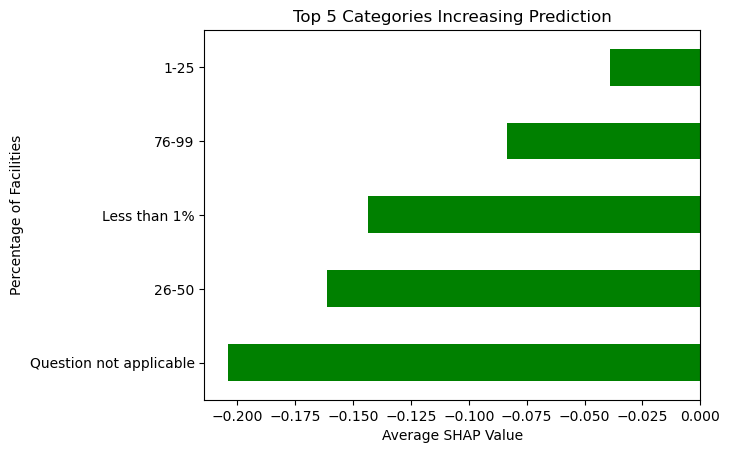

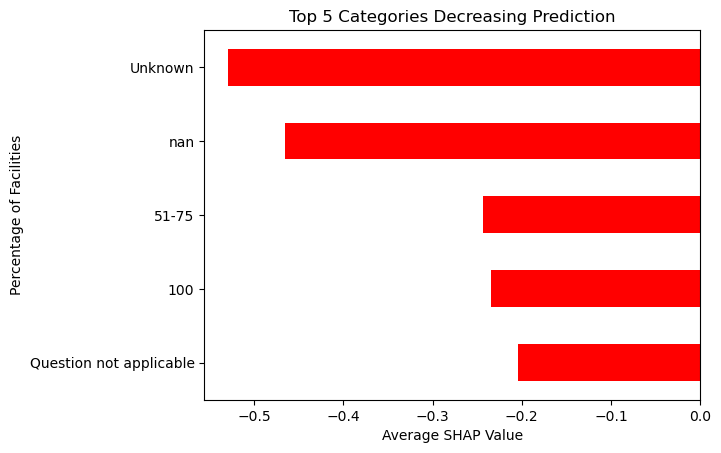

In [75]:
# Create a DataFrame for analysis
facilities_pct = pd.DataFrame({
    "Percentage of Facilities": X_train['w4_1b_c2_percent_facilities_exposed_to_water_risk'],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('w4_1b_c2_percent_facilities_exposed_to_water_risk')]
})

# Calculate average SHAP value per category
facilities_pct_impact = facilities_pct.groupby("Percentage of Facilities")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = facilities_pct_impact.sort_values(ascending=False).head(5)
top_5_negative = facilities_pct_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Values Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Values Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

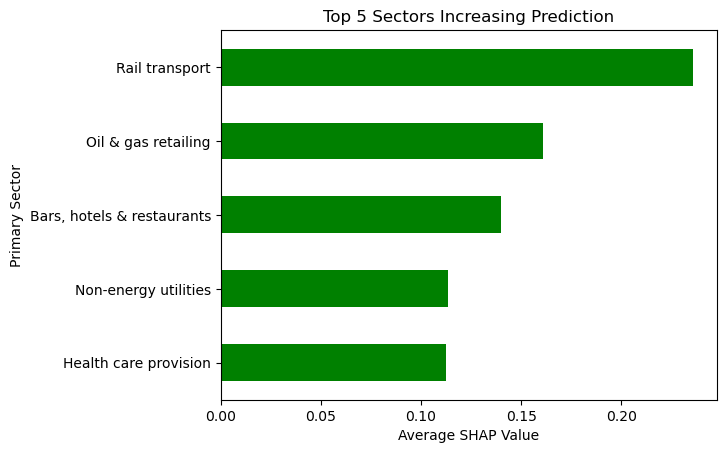

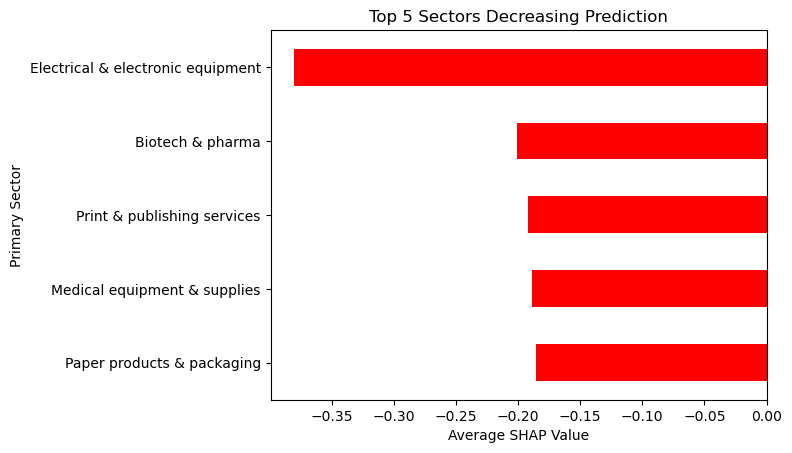

In [84]:
# Create a DataFrame for analysis
sector = pd.DataFrame({
    "Primary Sector": X_train['Primary sector'],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('Primary sector')]
})

# Calculate average SHAP value per category
sector_impact = sector.groupby("Primary Sector")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = sector_impact.sort_values(ascending=False).head(5)
top_5_negative = sector_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Sectors Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Sectors Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

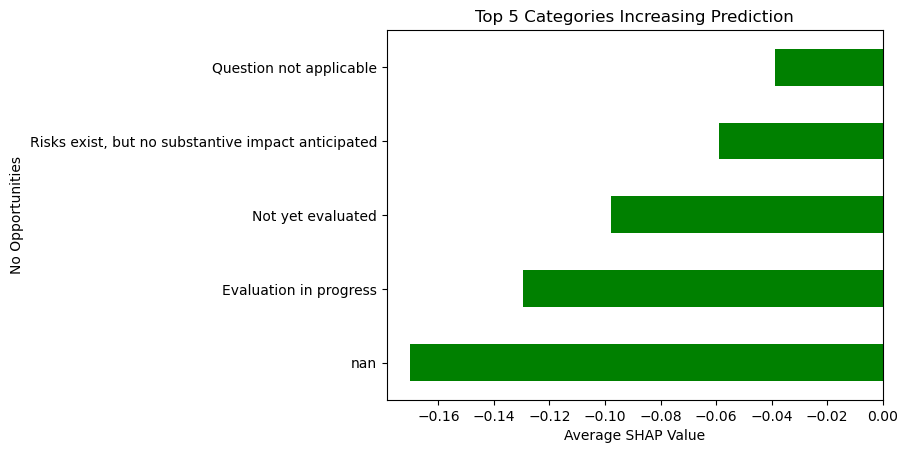

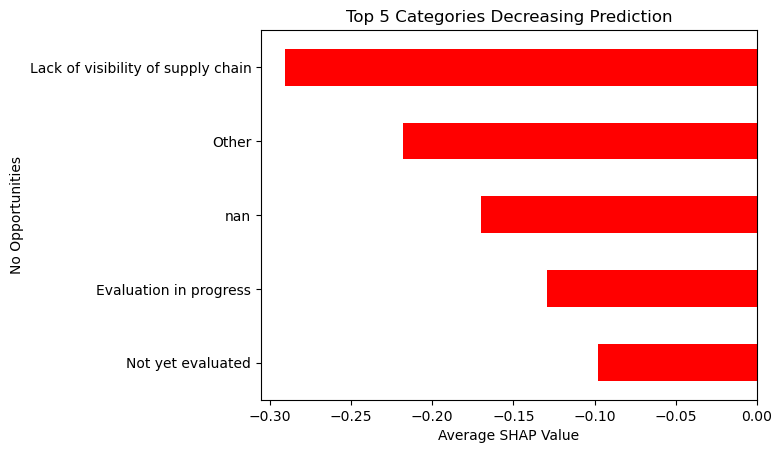

In [77]:
# Create a DataFrame for analysis
no_opportunities = pd.DataFrame({
    "No Opportunities": X_train['W4_2c_C1_no_value_chain_risk_primary_reason'],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('W4_2c_C1_no_value_chain_risk_primary_reason')]
})

# Calculate average SHAP value per category
no_opportunities_impact = no_opportunities.groupby("No Opportunities")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = no_opportunities_impact.sort_values(ascending=False).head(5)
top_5_negative = no_opportunities_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Categories Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Categories Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

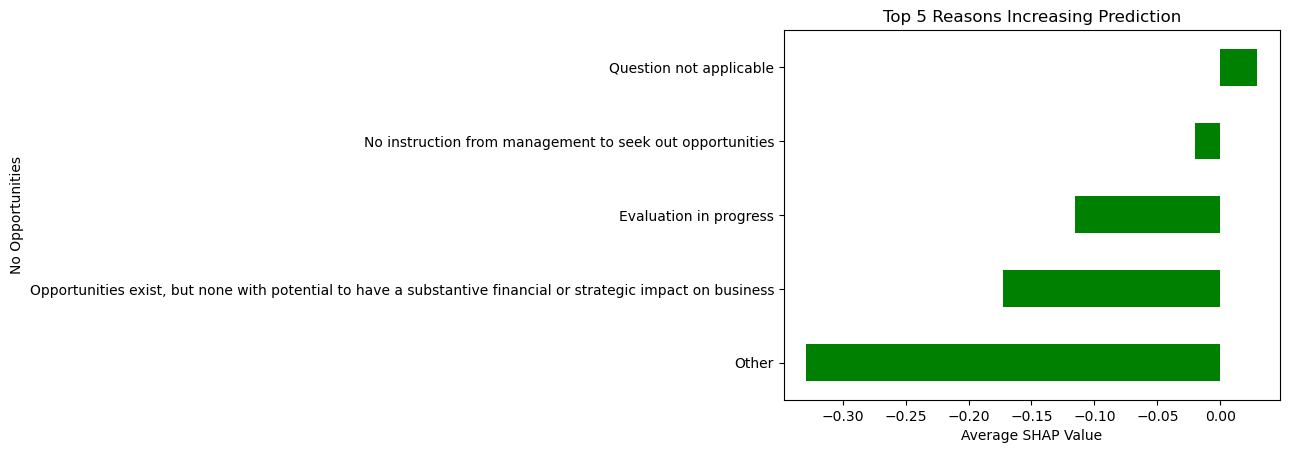

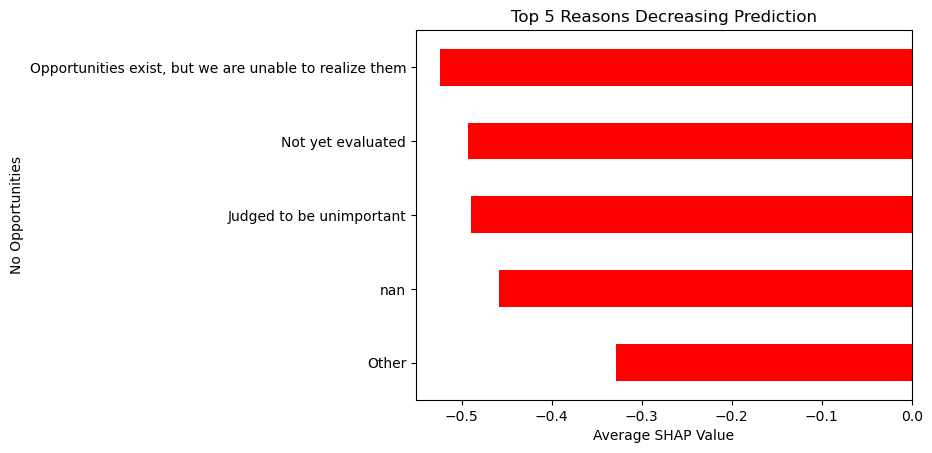

In [85]:
no_opportunities = pd.DataFrame({
    "No Opportunities": X_train['W4_3b_C1_no_opportunities_primary_reason'],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('W4_3b_C1_no_opportunities_primary_reason')]
})

# Calculate average SHAP value per category
no_opportunities_impact = no_opportunities.groupby("No Opportunities")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = no_opportunities_impact.sort_values(ascending=False).head(5)
top_5_negative = no_opportunities_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Reasons Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Reasons Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

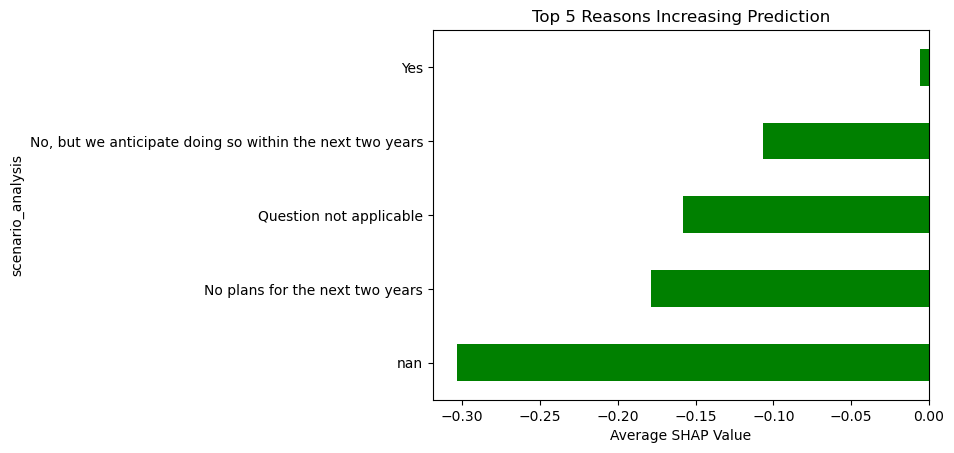

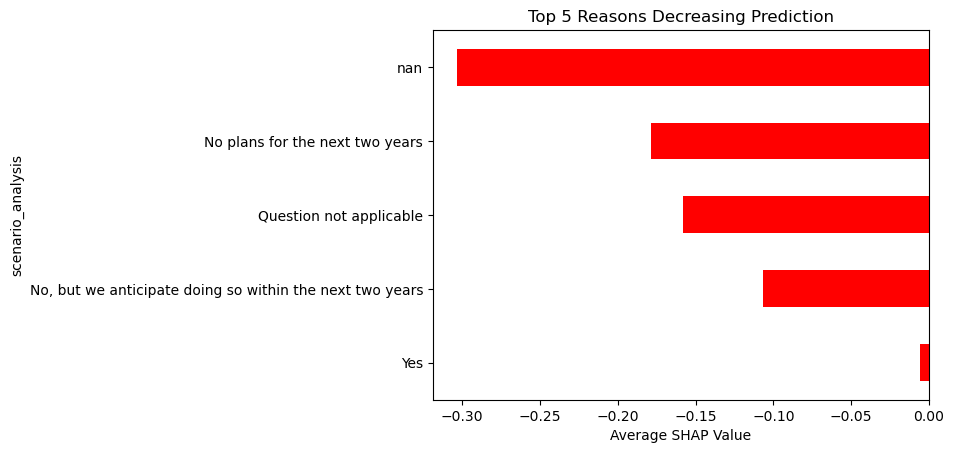

In [86]:
scenario_analysis = pd.DataFrame({
    "scenario_analysis": X_train["w73c1_use_scenario_analysis"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('w73c1_use_scenario_analysis')]
})

# Calculate average SHAP value per category
scenario_analysis_impact = scenario_analysis.groupby("scenario_analysis")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = scenario_analysis_impact.sort_values(ascending=False).head(5)
top_5_negative = scenario_analysis_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Reasons Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Reasons Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
'w6_2b_water_issues_agenda_frequency'
scenario_analysis = pd.DataFrame({
    "scenario_analysis": X_train["w73c1_use_scenario_analysis"],
    "SHAP_Value": shap_values_no_base[:, X_train.columns.get_loc('w73c1_use_scenario_analysis')]
})

# Calculate average SHAP value per category
scenario_analysis_impact = scenario_analysis.groupby("scenario_analysis")["SHAP_Value"].mean()

# Sort and select top 5 positive and bottom 5 negative
top_5_positive = scenario_analysis_impact.sort_values(ascending=False).head(5)
top_5_negative = scenario_analysis_impact.sort_values(ascending=True).head(5)

# Plot top 5 positive
top_5_positive.plot(kind='barh', color='green')
plt.title("Top 5 Reasons Increasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

# Plot top 5 negative
top_5_negative.plot(kind='barh', color='red')
plt.title("Top 5 Reasons Decreasing Prediction")
plt.xlabel("Average SHAP Value")
plt.gca().invert_yaxis()
plt.show()

### Try 2 